<a href="https://colab.research.google.com/github/einavres/Tissue-Layering-Tool/blob/main/Layering_tool.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**This notebook consists of 15 steps to get final excel sheet with a specific mass intensity throughout tissue layers.**

**Please follow the instructions in each step.**

**Green comments are added for the user changes.**

**Step number 1** - Uploading your data

In this part you need to enter your data file path.

If image is flipped, see comment in green to flip.

In [5]:
!pip install matplotlib_scalebar
from matplotlib_scalebar.scalebar import ScaleBar
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np

from google.colab import drive
drive.mount('/content/drive')

### $$$$ Edit file path here #####
MSdata_path = "/content/drive/MyDrive/Folder_name/File_name.txt"

df = pd.read_csv(MSdata_path,delimiter='\t',skiprows=[1,2])
x_axis = np.array([df.index[i][1] for i in range(df.index.shape[0])])
y_axis_opt_2 = df.iloc[:,0].to_numpy()
if len(df.index[0]) > 2:
  y_axis_opt_1 = np.array([df.index[i][2] for i in range(df.index.shape[0])])
  if y_axis_opt_1[0:100].std() < y_axis_opt_2[0:100].std():
    y_axis = y_axis_opt_1
else:
  y_axis = y_axis_opt_2

# y_axis = -y_axis    ### $$$$ uncomment to flip image
col = df.columns

df.drop(columns=df.columns[:1], axis=1, inplace=True)
df.drop(columns=df.columns[-2:], axis=1, inplace=True)
col = col[3:]
df.columns = col
df.columns = df.columns.to_numpy().astype(float)
df = df.sort_index(axis=1)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Step number 2** - Introducing your data peaks

In [2]:
df.columns
# df.columns[200:300]  ### if too many peaks to present

Index([ 74.0631,   84.963,  94.0678, 100.0786, 103.9807, 104.1072, 105.1124,
       114.0942, 115.0554, 116.9883, 118.0883, 129.0542, 130.0883, 132.0788,
       140.0704, 141.0699, 148.0989, 149.0246, 155.0702, 157.0848, 158.0154,
       161.0982, 163.0406, 169.0864, 170.0831, 172.0979, 173.0809, 177.0568,
       181.0526, 183.0763, 185.1181, 191.1071, 195.0679, 197.0889, 203.0566,
       215.1281, 217.0428, 217.1079, 223.0981, 225.0953, 226.9543, 227.1266,
       229.1442, 237.1491, 239.1639, 242.2847, 243.2899,   245.08, 246.0844,
       255.1551, 261.1348, 273.1725, 279.1019, 292.2043, 293.2083, 297.6153,
       301.1433, 308.2024, 309.2067, 353.2672, 413.2685, 447.3492, 448.3535,
       462.1491, 467.1055, 469.3304, 470.3345, 497.2387, 506.4218, 525.2901,
       536.1677, 537.1699, 541.1247, 541.2642, 549.4899, 551.5051, 556.2766,
       557.2819, 558.2897, 565.2877, 567.2994, 569.3165, 573.4899, 575.2913,
       575.5047, 576.5084, 577.5195, 578.2606, 578.5239, 579.2647, 579.5342,

**Step number 3** - Insert your peak of interest

Find your peak from the list in Step number 2 and insert it instead of the existing number.

In [3]:
#### find your peak $$$$
target_peak = 292.2043

**Step number 4** - View peak distribution image

1 pixel = 50 micrometer. This parameter depends on your instrument settings.

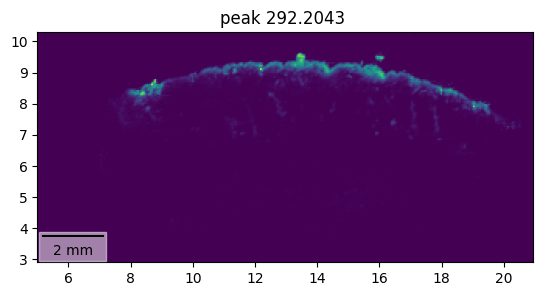

In [6]:
aspect_ratio = 1
plt.axes().set_aspect(aspect_ratio, 'box')
plt.xlim(min(x_axis), max(x_axis))
plt.ylim(min(y_axis), max(y_axis))
plt.scatter(x_axis.T, y_axis.T, marker='.', c = df[target_peak],s = 3)
plt.title('peak '+str(target_peak) + " " )
scalebar = ScaleBar(1,'mm',box_alpha=0.5,location="lower left",    rotation="horizontal")
plt.gca().add_artist(scalebar)
plt.show()

**Step number 5** - Normalization of data

Different types of normalizations are offered (assigned in green): normalization by maximum intensity (max-norm), normalization by mean intensity (mean-norm), and normalization by the sum of the intensities (sum-norm) also known as TIC (total ion current).

Those normalizations can be done per pixel or per row.

Please choose the one is best for your data.

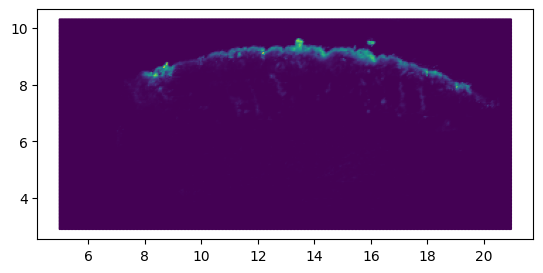

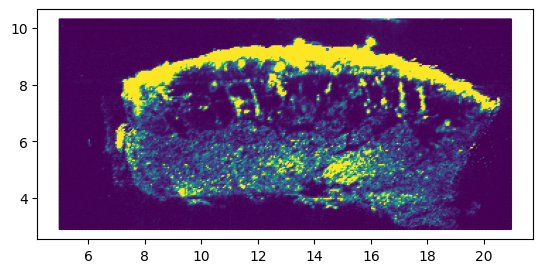

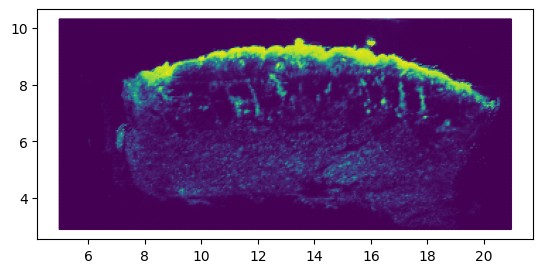

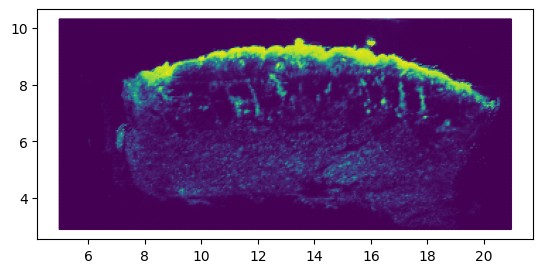

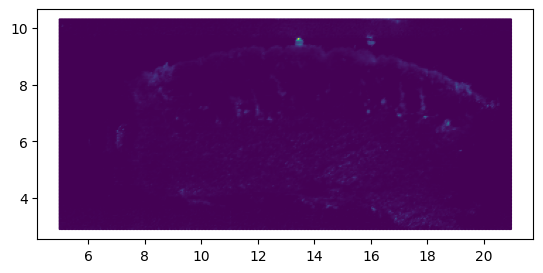

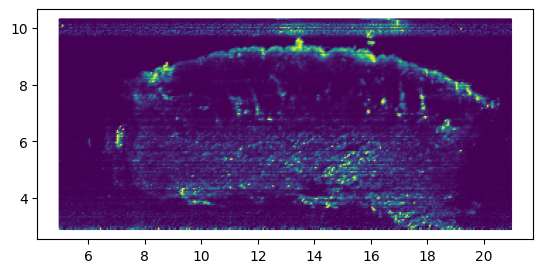

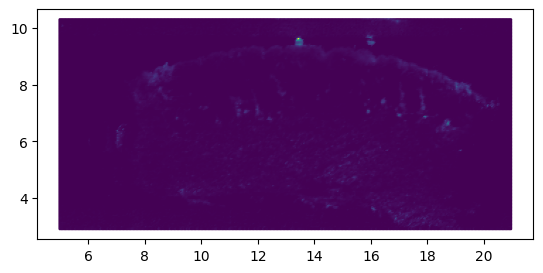

In [7]:
#### without normalization
df_copy = df.copy()
plt.axes().set_aspect(aspect_ratio, 'box')
plt.scatter(x_axis.T, y_axis.T, marker='.', c = df_copy[target_peak],s = 3)
plt.show()

#### check if normalization is needed

#### Pixel-wise normalization
#### max-norm
df_copy = df.copy()
df_copy = df_copy.div(df.max(axis=1)+0.0000001 ,axis = 0)
plt.axes().set_aspect(aspect_ratio, 'box')
plt.scatter(x_axis.T, y_axis.T, marker='.', c = df_copy[target_peak],s = 3)
plt.show()

#### mean-norm
df_copy = df.copy()
df_copy = df_copy.div(df.mean(axis=1)+0.0000001 ,axis = 0)
plt.axes().set_aspect(aspect_ratio, 'box')
plt.scatter(x_axis.T, y_axis.T, marker='.', c = df_copy[target_peak],s = 3)
plt.show()

#### sum-norm (TIC)
df_copy = df.copy()
df_copy = df_copy.div(df.sum(axis=1)+0.0000001 ,axis = 0)
plt.axes().set_aspect(aspect_ratio, 'box')
plt.scatter(x_axis.T, y_axis.T, marker='.', c = df_copy[target_peak],s = 3)
plt.show()


#### Row-wise normalization
#### mean-norm
df_copy = df.copy()
for y in np.unique(y_axis):
   df_copy.iloc[y_axis == y] = df_copy.iloc[y_axis == y].div(df_copy.iloc[y_axis == y].mean())
plt.axes().set_aspect(aspect_ratio, 'box')
plt.scatter(x_axis.T, y_axis.T, marker='.', c = df_copy[target_peak],s = 3)
plt.show()

#### max-norm
df_copy = df.copy()
for y in np.unique(y_axis):
   df_copy.iloc[y_axis == y] = df_copy.iloc[y_axis == y].div(df_copy.iloc[y_axis == y].max())
plt.axes().set_aspect(aspect_ratio, 'box')
plt.scatter(x_axis.T, y_axis.T, marker='.', c = df_copy[target_peak],s = 3)
plt.show()

#### sum-norm (TIC)
df_copy = df.copy()
for y in np.unique(y_axis):
   df_copy.iloc[y_axis == y] = df_copy.iloc[y_axis == y].div(df_copy.iloc[y_axis == y].sum())
plt.axes().set_aspect(aspect_ratio, 'box')
plt.scatter(x_axis.T, y_axis.T, marker='.', c = df_copy[target_peak],s = 5)
plt.show()

**Step number 6** - Data clusters

In this part the image is divided into clusters based on the MS data.

You need to choose the number of clusters (K parameter) suitable for your image in order to distinguish between background and tissue.

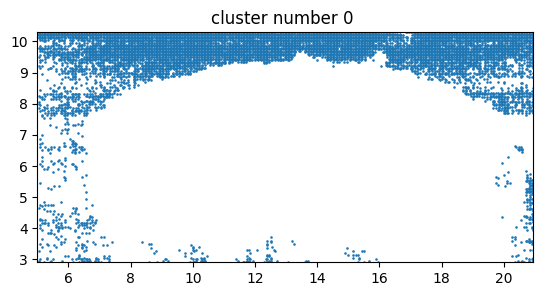

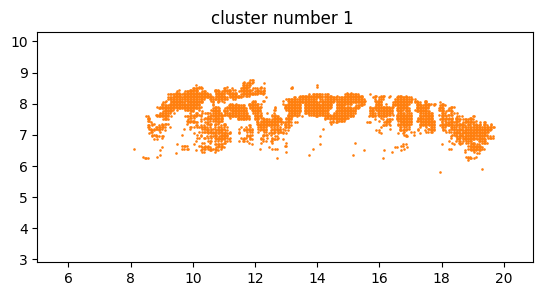

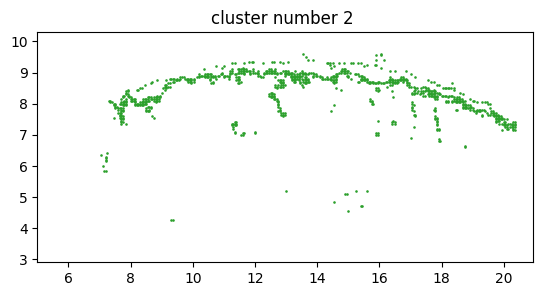

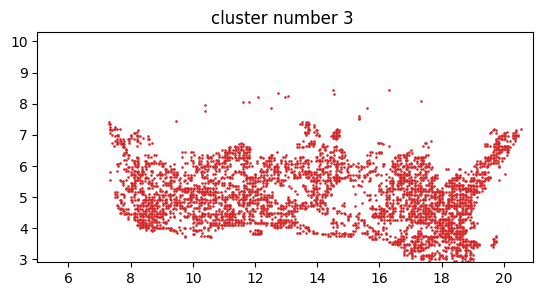

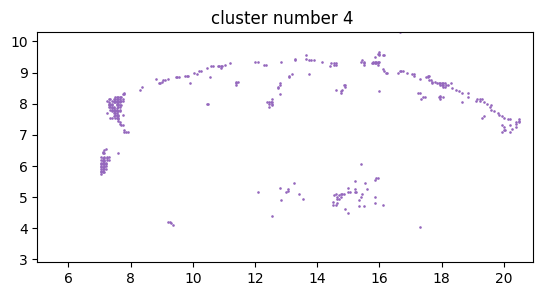

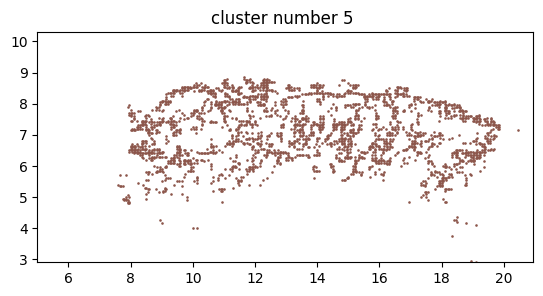

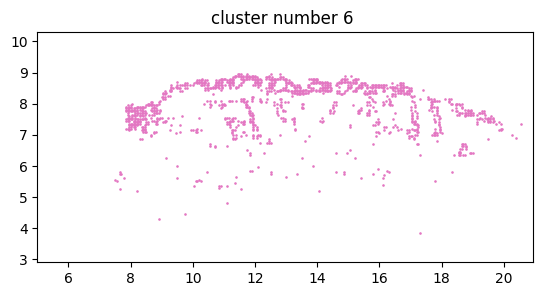

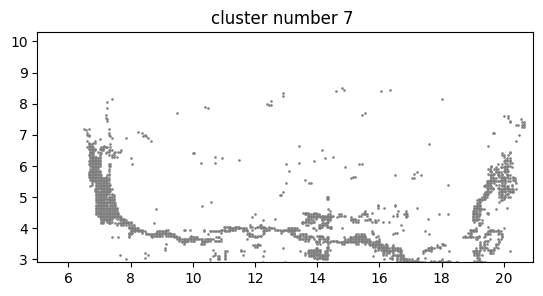

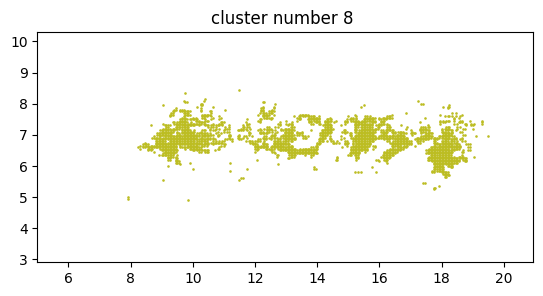

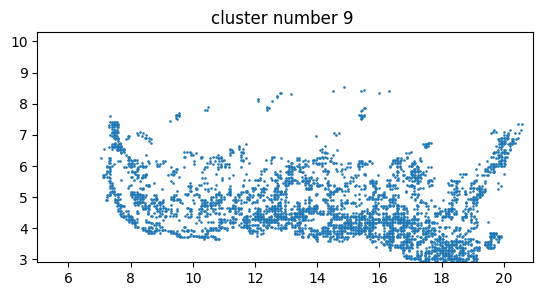

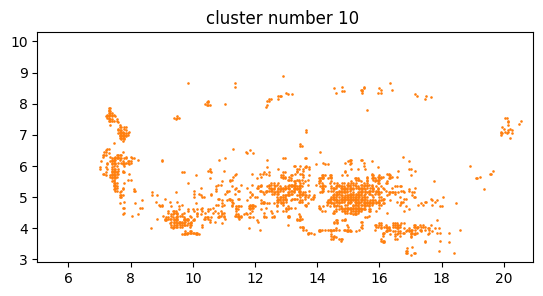

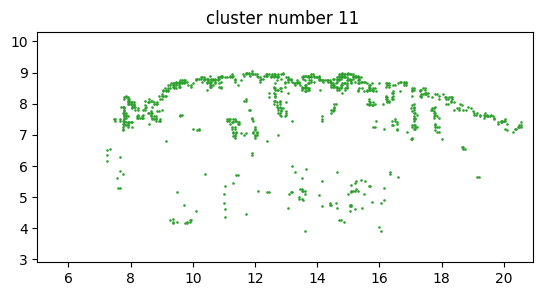

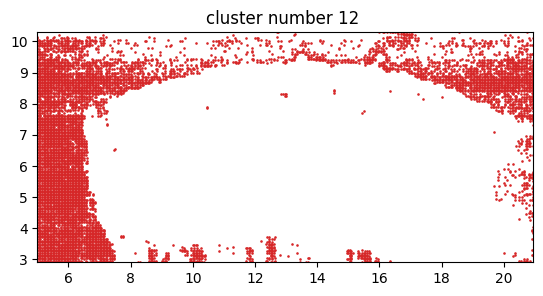

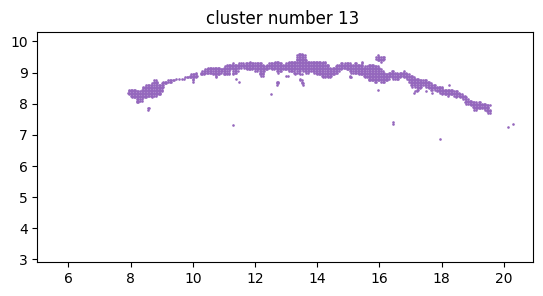

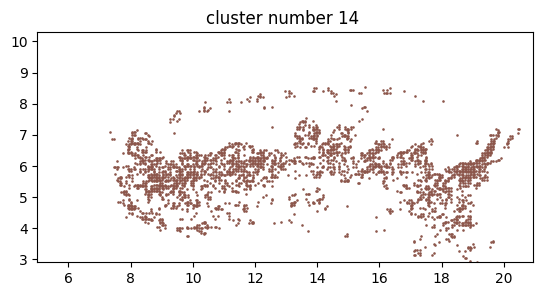

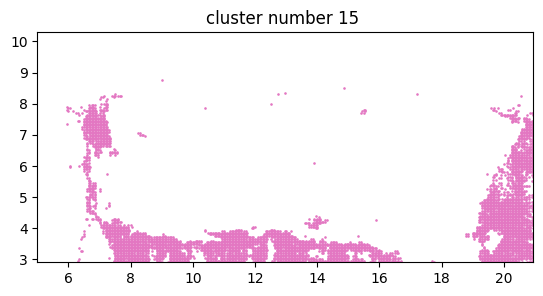

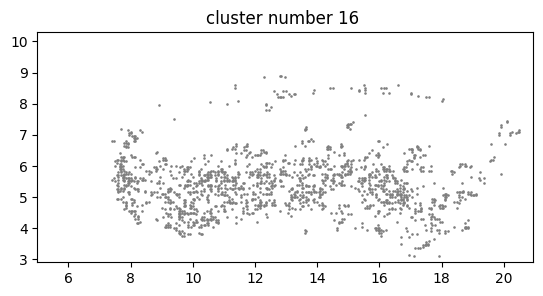

In [16]:
import matplotlib.colors as mcolors

df_norm = df.copy()

### add normalization if needed:

df_norm = df.div(df.mean(axis=1)+0.0000001 ,axis = 0)  #### mean normalization
# df_norm = df.div(df.sum(axis=1)+0.0000001 ,axis = 0)  ####TIC per pixel norm
# df_norm = df.div(df.max(axis=1)+0.0000001 ,axis = 0) ### max normalization

# for y in np.unique(y_axis):    ### mean per row normalization
#    df_norm.iloc[y_axis == y] = df_norm.iloc[y_axis == y].div(df_norm.iloc[y_axis == y].mean())

# for y in np.unique(y_axis):   #### max per row normalization
#    df_norm.iloc[y_axis == y] = df_norm.iloc[y_axis == y].div(df_norm.iloc[y_axis == y].max())

# for y in np.unique(y_axis):  #### sum-norm (TIC)
#    df_norm.iloc[y_axis == y] = df_norm.iloc[y_axis == y].div(df_norm.iloc[y_axis == y].sum())


plt.axes().set_aspect(aspect_ratio, 'box')
plt.scatter(x_axis.T, y_axis.T, marker='.', c = df_norm.mean(axis = 1),s = 3)


data_mesh = df_norm.to_numpy()
C = list(mcolors.TABLEAU_COLORS)
K = 17                   #### choose number of clusters
km = KMeans(n_clusters=K)

km.fit(data_mesh)
c_ = km.predict(data_mesh)
plt.axes().set_aspect(aspect_ratio, 'box')


for k in range(K):
  plt.clf()
  my_members = (c_ == k)
  plt.axes().set_aspect(aspect_ratio, 'box')
  plt.xlim(min(x_axis), max(x_axis))
  plt.ylim(min(y_axis), max(y_axis))
  plt.grid(False)
  plt.scatter(x_axis[my_members].T, y_axis[my_members].T, marker='.',c=C[k%9],s = 3)
  plt.title('cluster number '+str(k) + " "  )
  plt.show()

**Step number 7** - Background clusters

In this part you need to insert the cluster numbers that match background as it shown in the results of Step number 6.

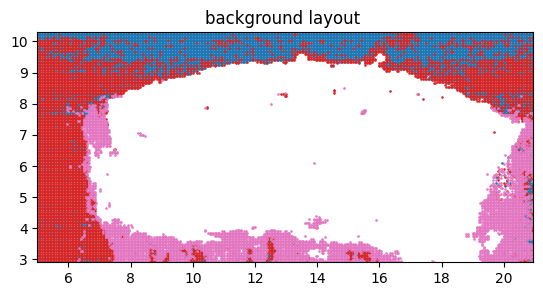

In [17]:
### $$$ pick background clusters  ###

bg_clusters =[0,12,15] #### insert the cluster numbers that match background, separated by ","

plt.axes().set_aspect(aspect_ratio, 'box')
plt.xlim(min(x_axis), max(x_axis))
plt.ylim(min(y_axis), max(y_axis))
for k in bg_clusters:
  my_members = (c_ == k)

  plt.scatter(x_axis[my_members].T, y_axis[my_members].T, marker='.',c=C[k%9],s = 3)

plt.title('background layout '  )
plt.show()

**Step number 8** - Show final tissue cluster



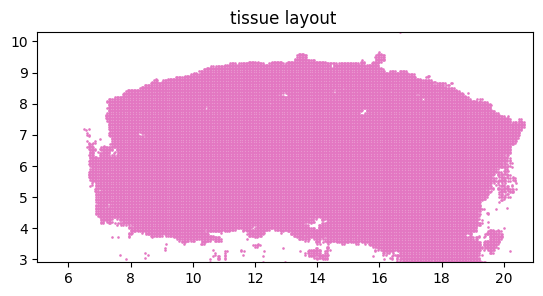

In [23]:
### Show final tissue ###
tissue_cluster_pix = [pix not in bg_clusters for pix in c_]
tissue = df_norm[tissue_cluster_pix]
data_mesh_tissue = tissue.to_numpy()
plt.axes().set_aspect(aspect_ratio, 'box')
plt.xlim(min(x_axis), max(x_axis))
plt.ylim(min(y_axis), max(y_axis))
plt.scatter(x_axis[tissue_cluster_pix].T, y_axis[tissue_cluster_pix].T, marker='.',c=C[k%9],s = 3)
plt.title('tissue layout '  )
plt.show()

df_norm['x'] = x_axis
df_norm['y']  = y_axis
tissue = df_norm[tissue_cluster_pix]
x_axis_tissue = tissue['x']
y_axis_tissue = tissue['y']

**Step number 9** - Final tissue image cropping

If cropping of the final tissue image is needed, please remove the commnet sign in all lines, and edit the second line for the y or/and x axis cropping.


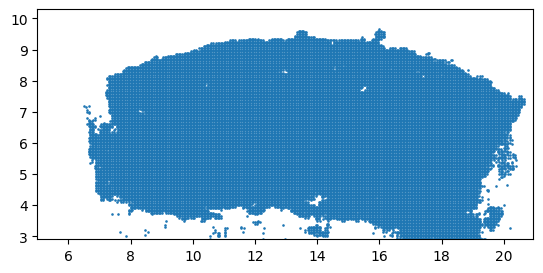

In [27]:
#### optional - if cropping needed
tissue_cluster_pix = np.logical_and( tissue_cluster_pix ,df_norm['y']<10 )   #### change condition here: x/y , >/< , threshold number
tissue = df_norm[tissue_cluster_pix]
x_axis_tissue = tissue['x']
y_axis_tissue = tissue['y']
data_mesh_tissue = tissue.to_numpy()
plt.axes().set_aspect(aspect_ratio, 'box')
plt.xlim(min(x_axis), max(x_axis))
plt.ylim(min(y_axis), max(y_axis))
plt.scatter(x_axis[tissue_cluster_pix].T, y_axis[tissue_cluster_pix].T, marker='.',s = 3)



**Step number 10** - Straightening the tissue

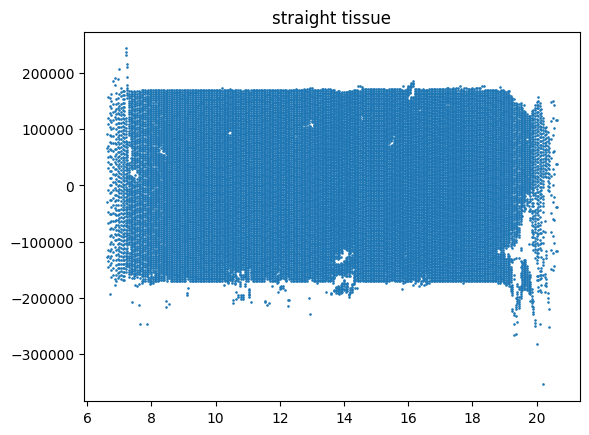

In [28]:
str_tissue = tissue.copy()
str_tissue['y'] = tissue.groupby('x')['y'].transform(lambda x: ((x- x.mean())/x.std()))
str_tissue['y']  = str_tissue['y']*100000
str_tissue_np = str_tissue.to_numpy()
plt.scatter(str_tissue_np[:,-2].T, str_tissue_np[:, -1].T, marker='.',c=C[k%9],s = 3)
plt.title('straight tissue' )
plt.show()

**Step number 11** - Divide the tissue to layers

In this part you need to choose the number of layers you want to divide your tissue to (K parameter).

As the K number is higher, the layers will be thinner.

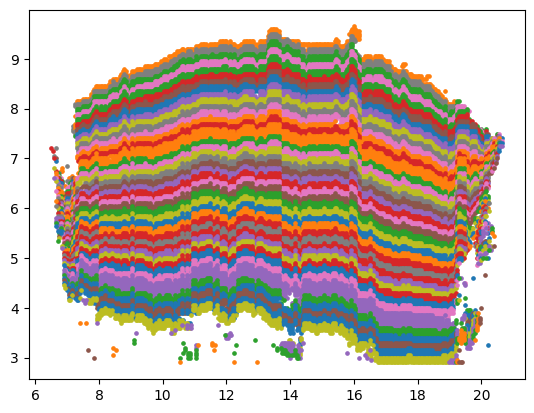

In [29]:
#### make layers

K = 50  ### $$$$$ for thinner layers up this number

str_tissue_np_xy = str_tissue_np[:,[-1,-2]]
str_tissue_np_xy = np.nan_to_num(str_tissue_np_xy)

km = KMeans(n_clusters=K)
km.fit(str_tissue_np_xy)
c_ = km.predict(str_tissue_np_xy)


df_results_new = pd.DataFrame()
for k in range(K):
  my_members_thin = (c_ == k)
  str_tissue_np
  df_results_new.loc[k,'h'] =  str_tissue_np_xy[my_members_thin].mean()

df_results_new.reset_index(inplace=True)
df_results_new.sort_values('h',inplace=True,ascending=False)
K_re = df_results_new['index'].to_numpy()

i = 0
for k in K_re:
  my_members_thin = (c_ == k)
  plt.scatter(x_axis_tissue[my_members_thin].T, y_axis_tissue[my_members_thin].T, marker='.',c=C[k%9],s = 22)
  i = i+1

plt.show()

**Step number 12** - Final tissue divided into layers

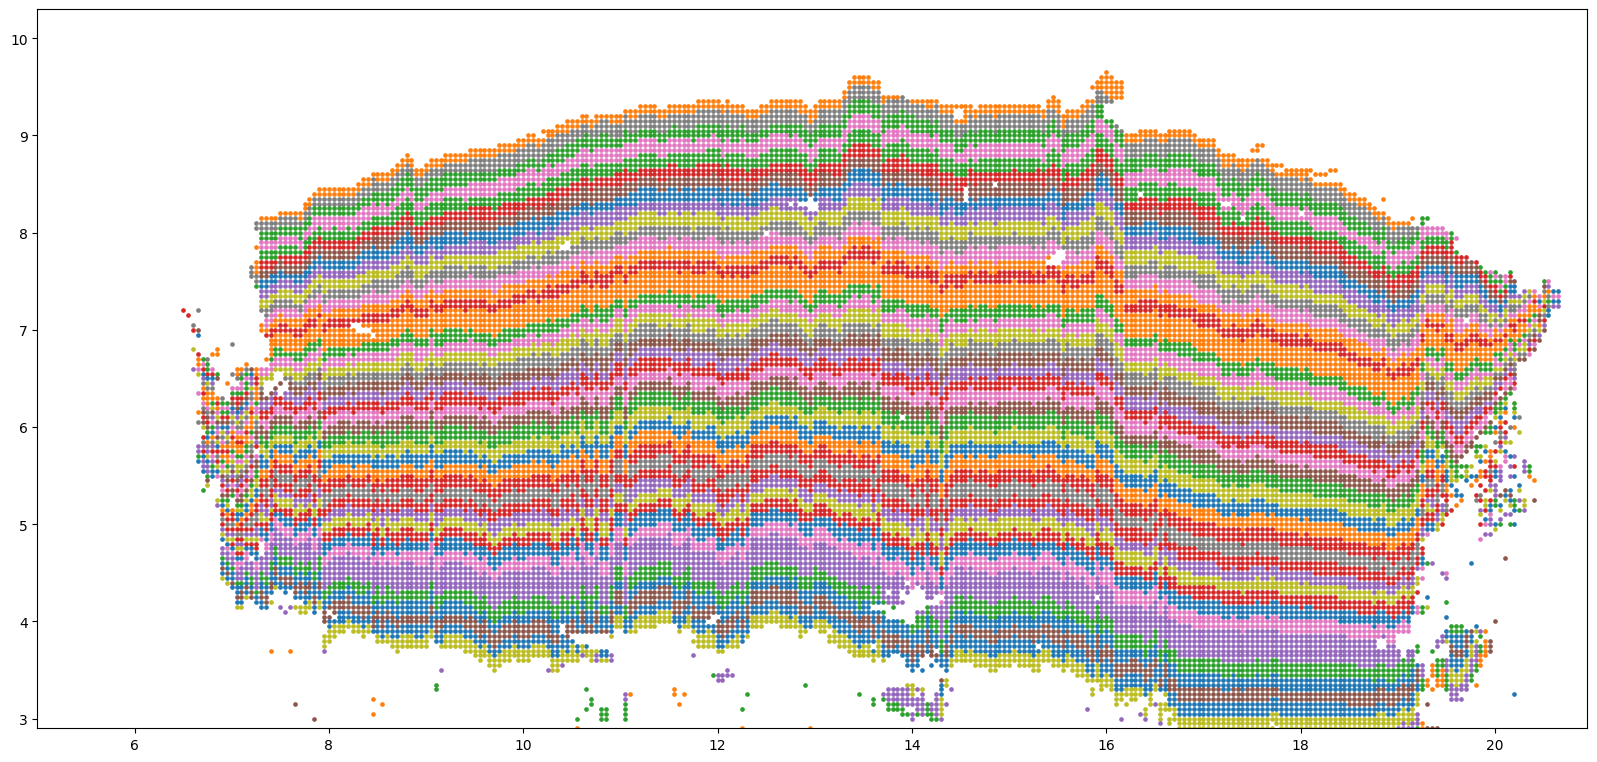

In [30]:

plt.figure(figsize=(20,12))
plt.axes().set_aspect(aspect_ratio, 'box')
plt.xlim(min(x_axis), max(x_axis))
plt.ylim(min(y_axis), max(y_axis))

i = 0
for k in K_re:
  my_members_thin = (c_ == k)
  plt.scatter(x_axis_tissue[my_members_thin].T, y_axis_tissue[my_members_thin].T, marker='.',c=C[k%9],s = 22)
  i = i+1

plt.show()

**Step number 13** - Show each layer in separate image

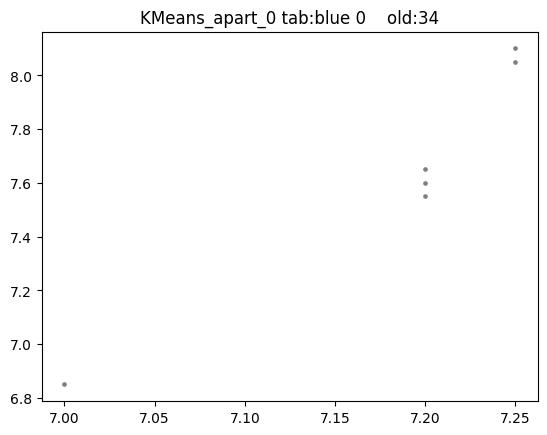

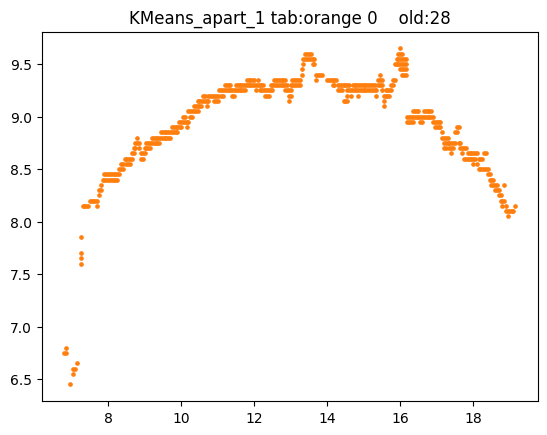

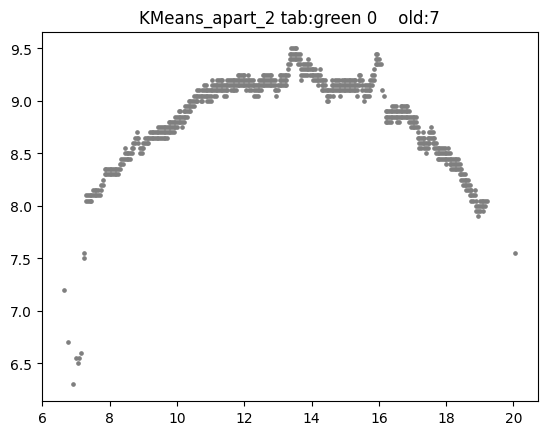

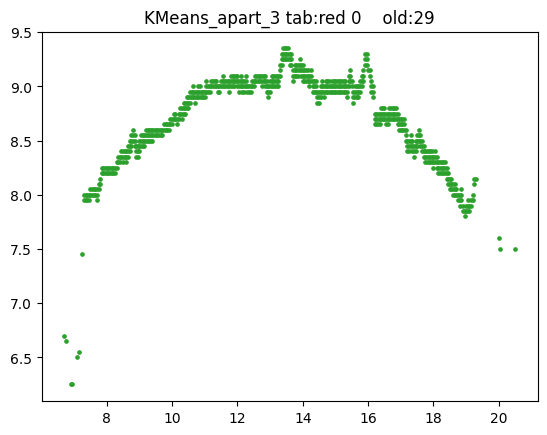

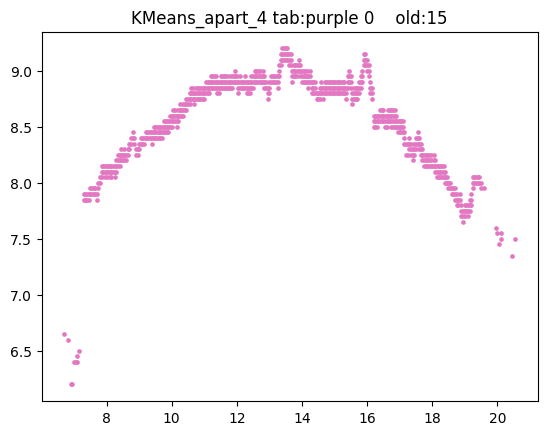

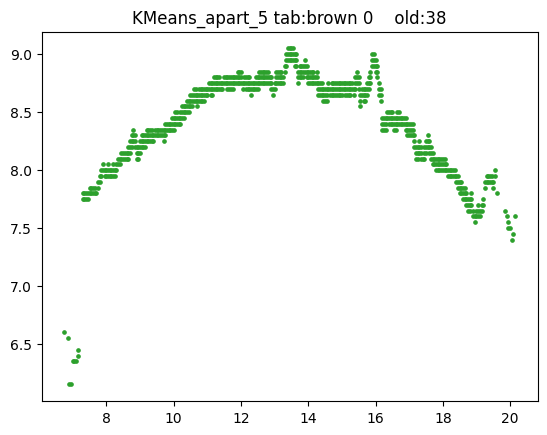

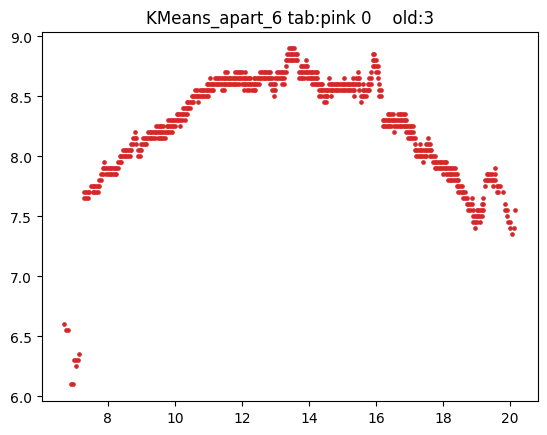

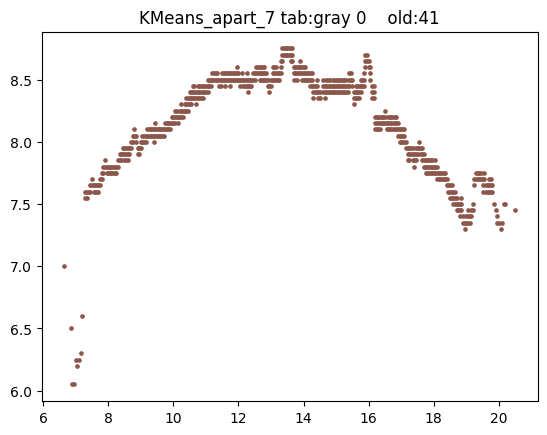

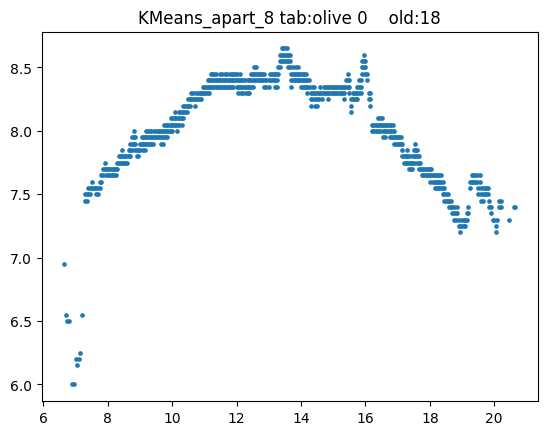

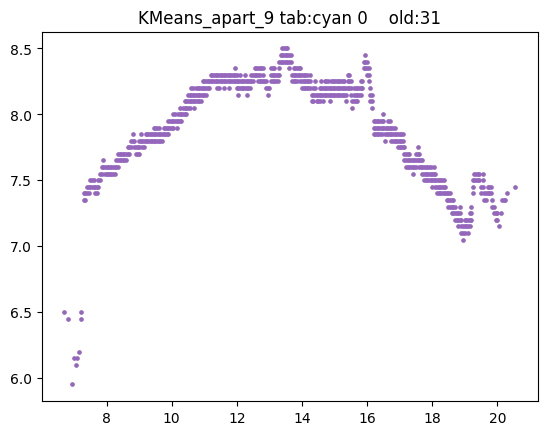

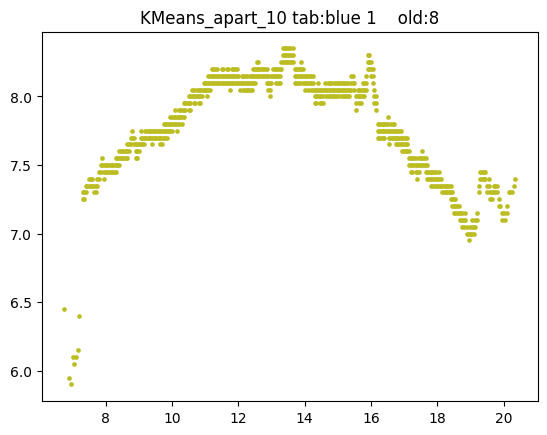

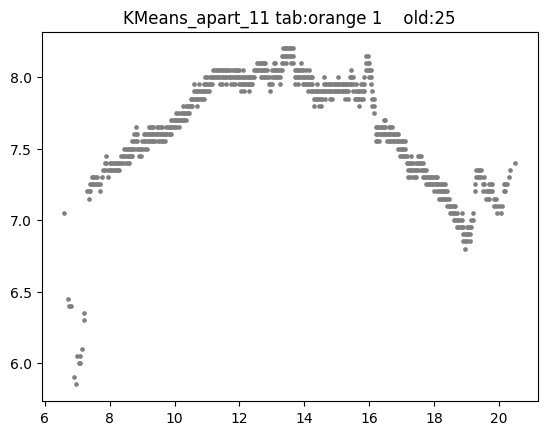

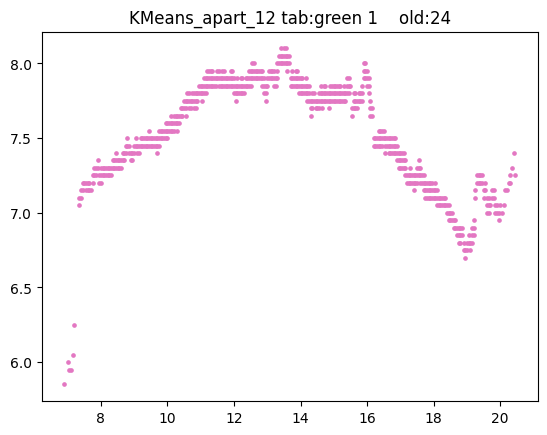

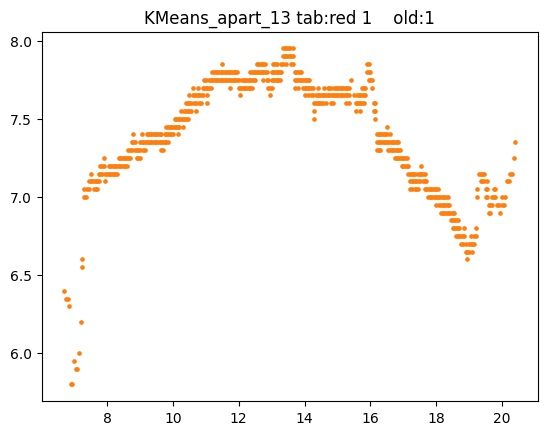

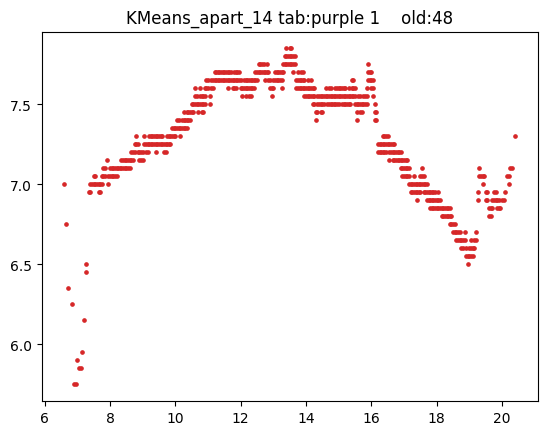

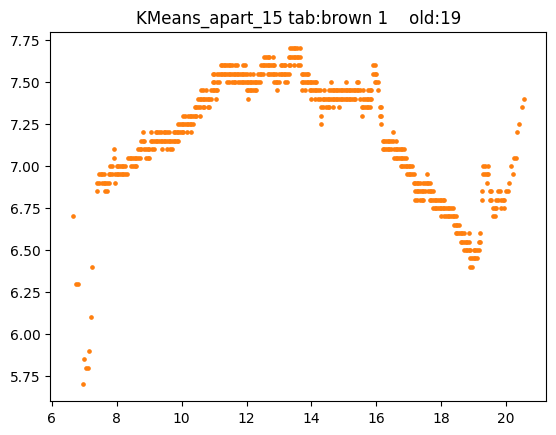

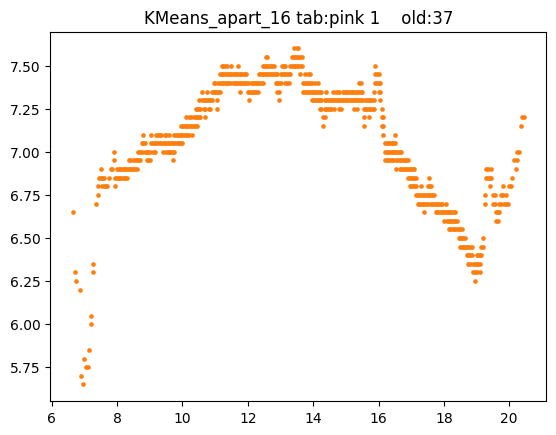

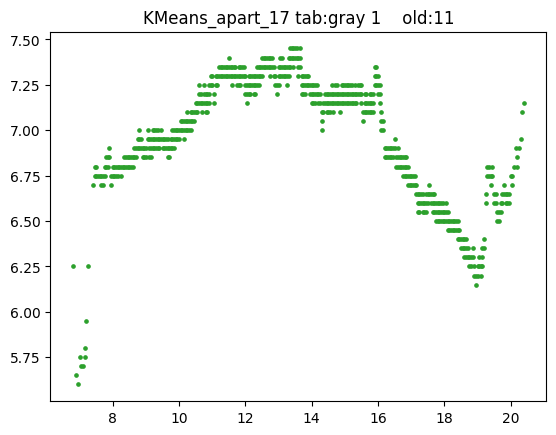

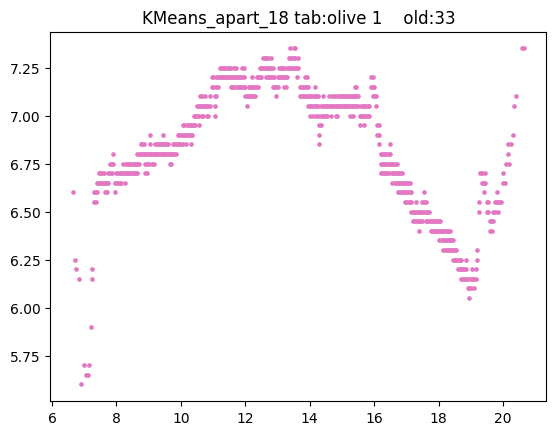

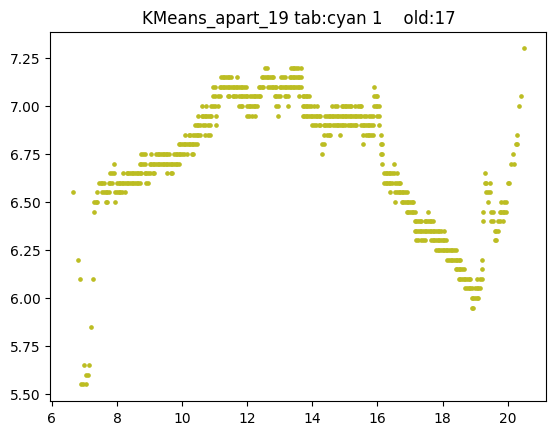

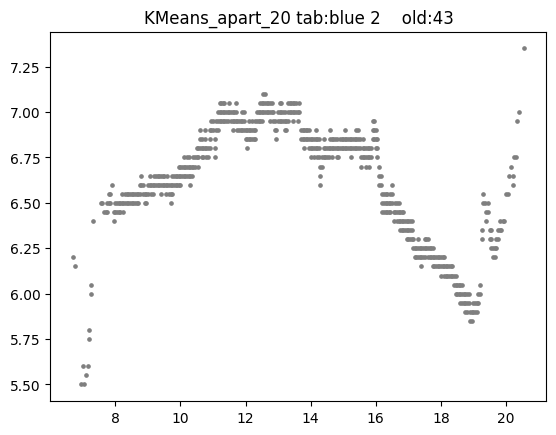

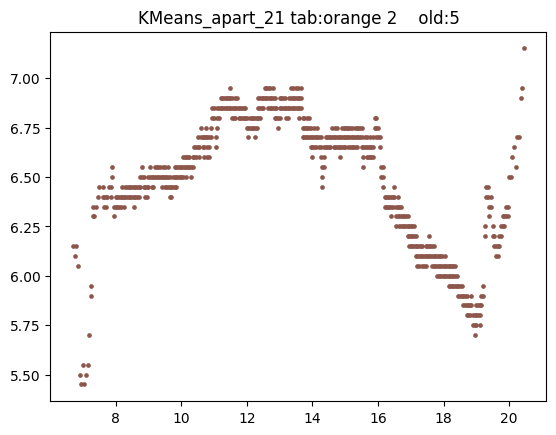

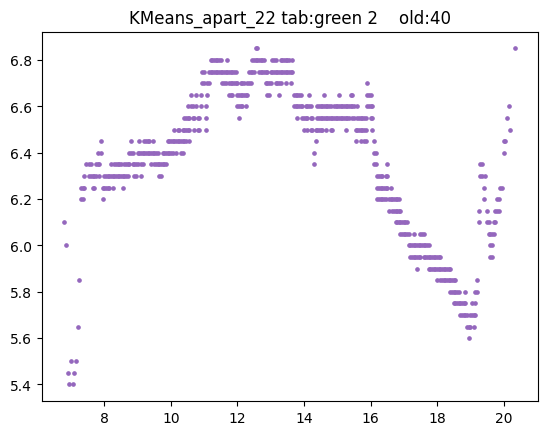

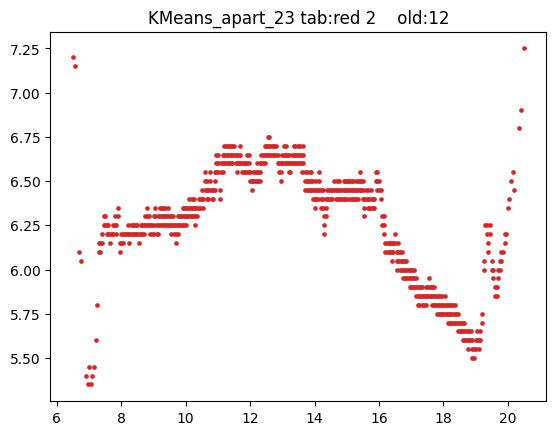

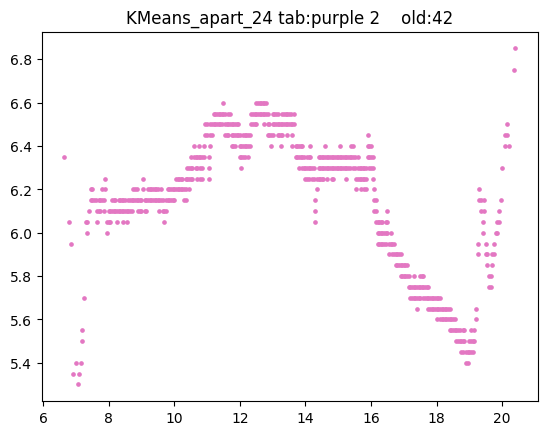

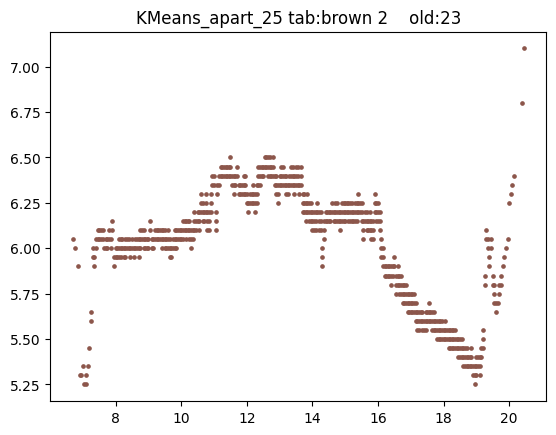

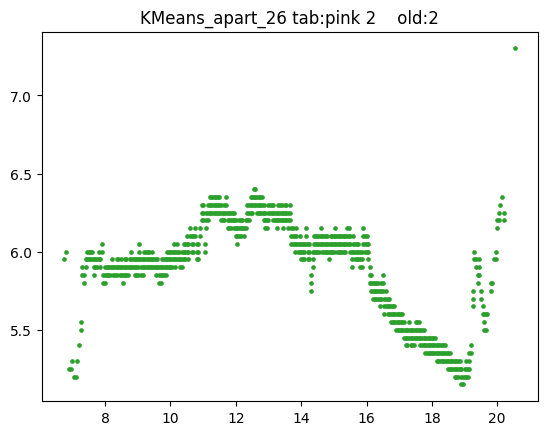

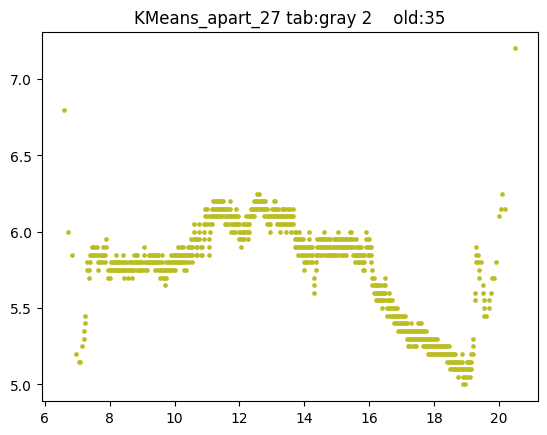

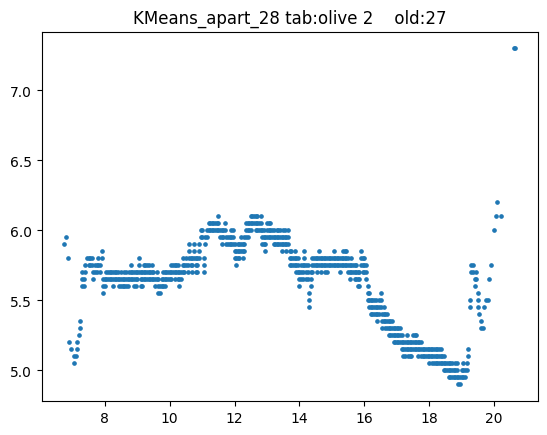

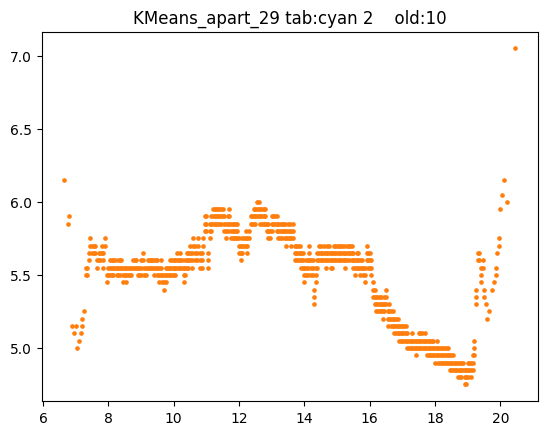

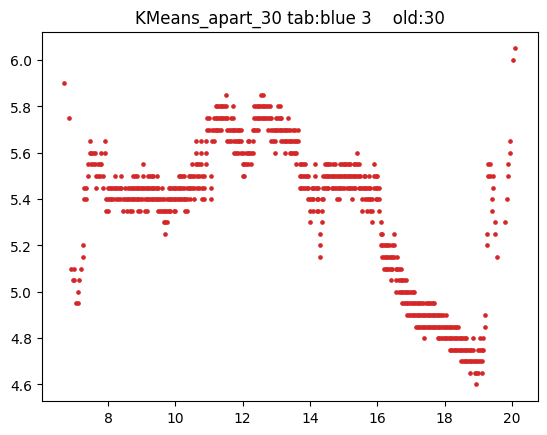

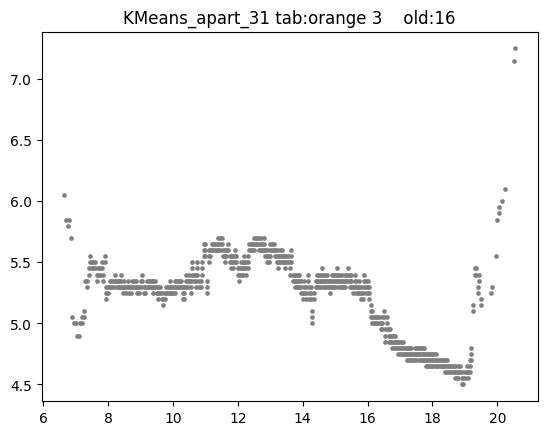

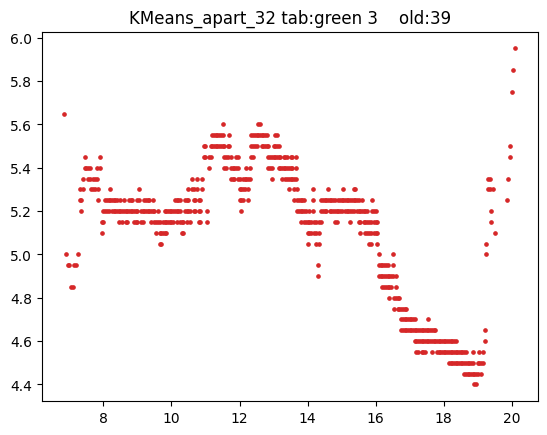

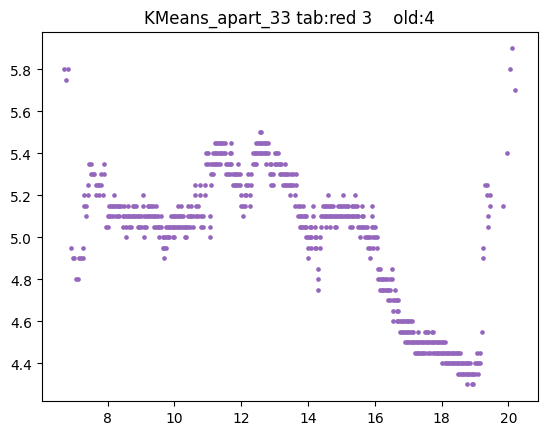

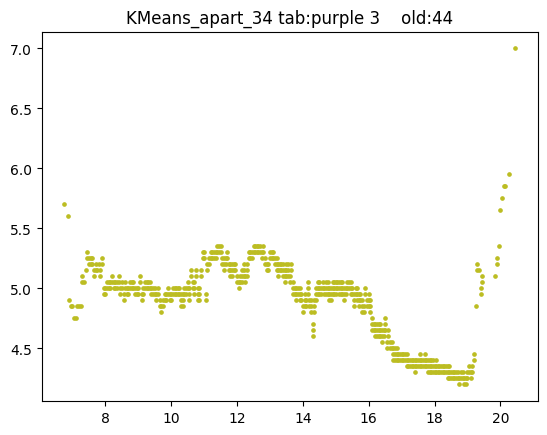

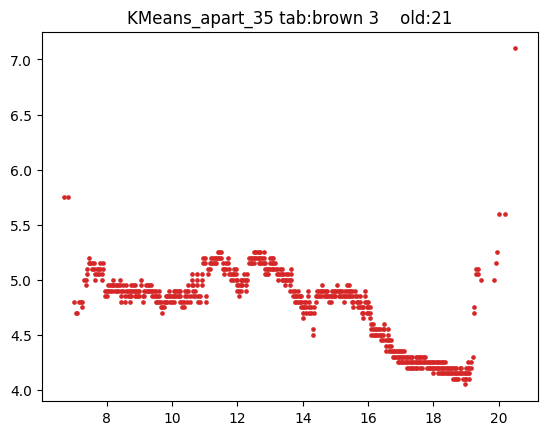

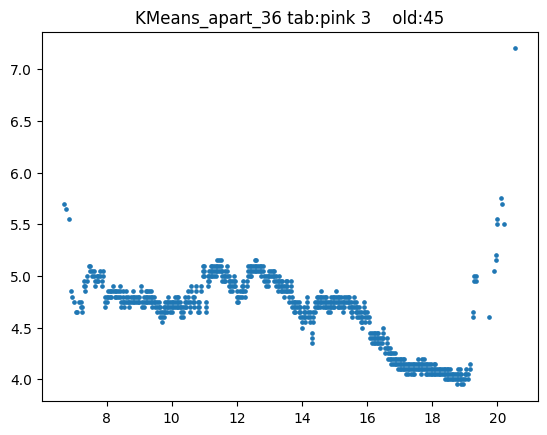

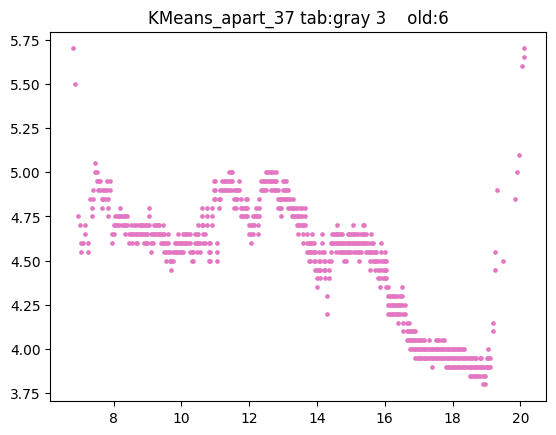

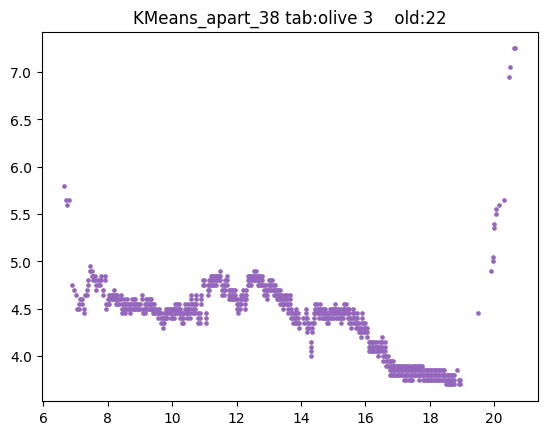

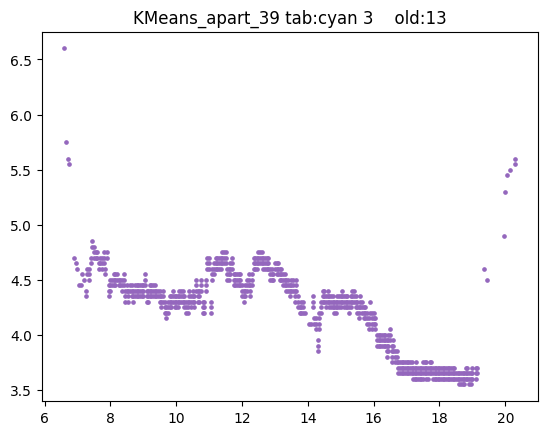

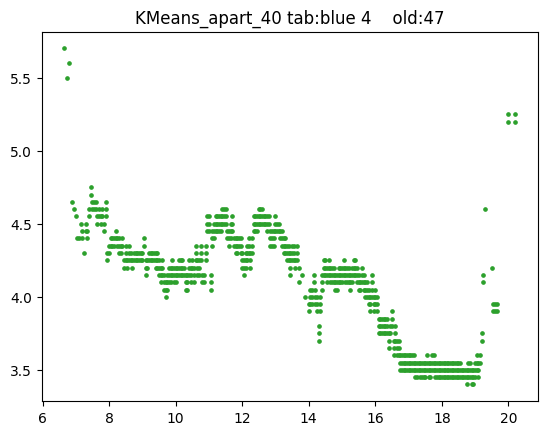

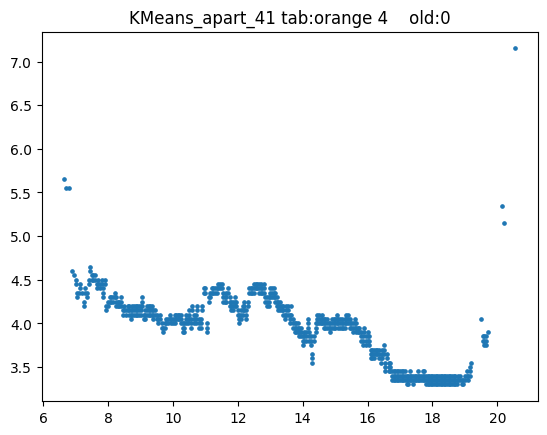

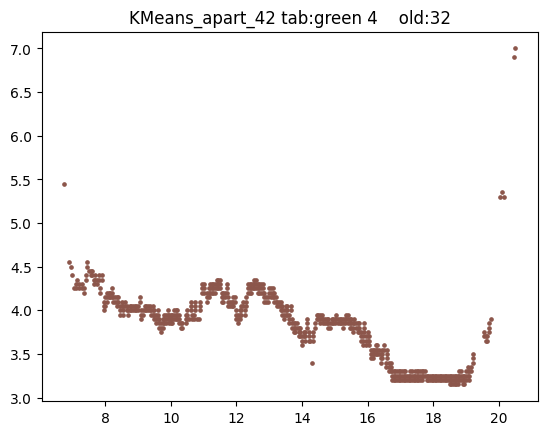

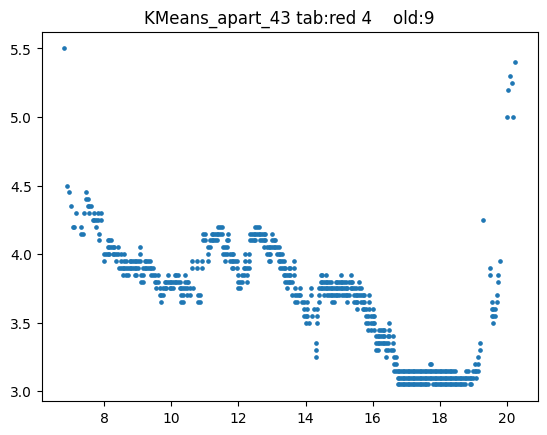

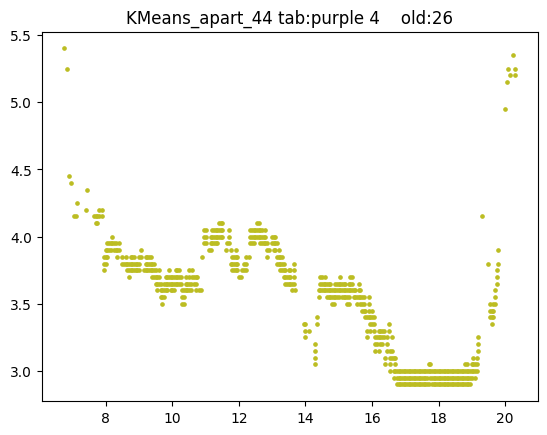

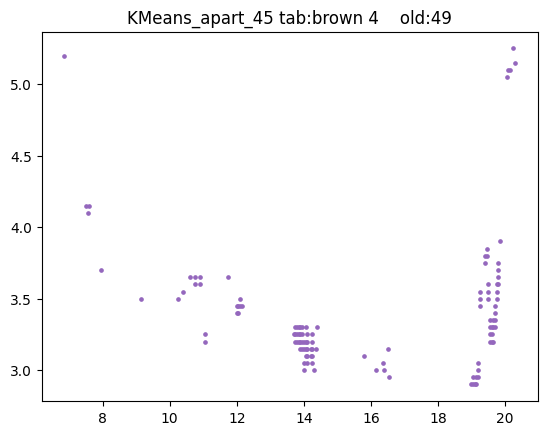

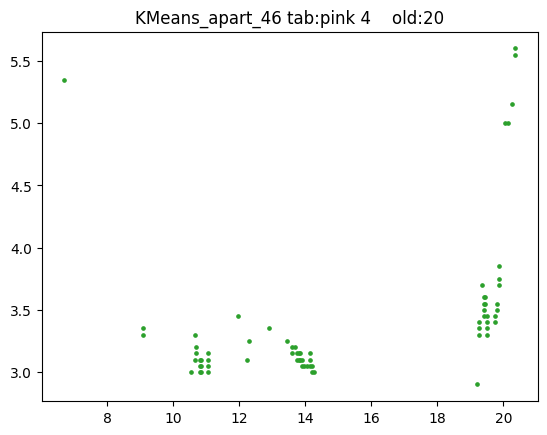

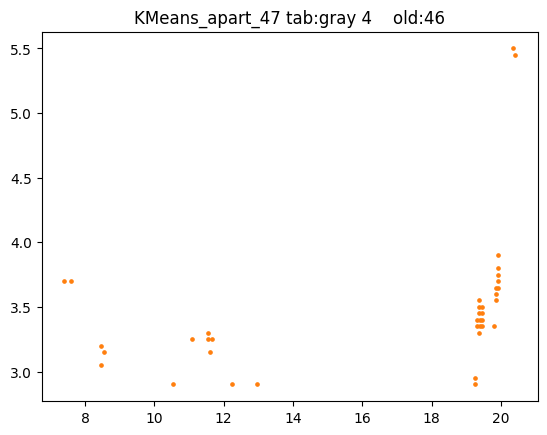

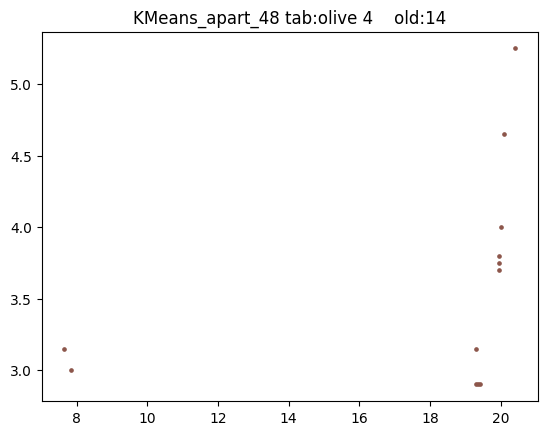

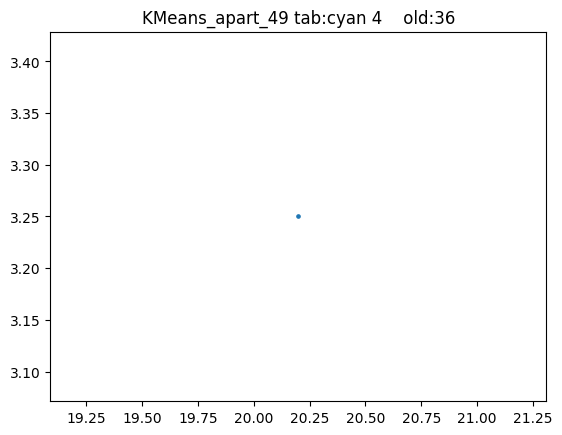

In [32]:
i = 0
for k in K_re:
  plt.clf()
  my_members_thin = (c_ == k)
  plt.scatter(x_axis_tissue[my_members_thin].T, y_axis_tissue[my_members_thin].T, marker='.',c=C[k%9],s = 22)
  plt.title('KMeans_apart_'+str(i) + " " + str(C[i%10] +" "+ str(int(i/10))) + "    old:"+ str(k) )
  i=i+1
  plt.show()

**Step number 14** - Create a table with final results

In this part you can see in a table the information about your peak of interest intensity in each layer.

You will receive the mean width of pixels in each layer. To convert it to meters units you need to multiplicate with your pixel size in meters.

In [33]:
#### creates results csv file with table

df_results = pd.DataFrame()
i = 0
for k in K_re:
  df_results.loc[k,'color+id'] = str(C[i%10] +" "+ str(int(i/10)))
  thin_cluster_pix = (c_ == k)
  df_results.loc[k,'y_max'] = tissue[thin_cluster_pix]['y'].max()
  df_results.loc[k,str(target_peak) +" mean intensity"] = tissue[thin_cluster_pix][target_peak].mean()#/df_relevant_2_circ[c_5 in [108,109,110]].sum().sum()  ## TIC normalized by the big cluster
  df_results.loc[k,'mean width (pixels)'] = tissue[thin_cluster_pix].groupby('x')['y'].count().mean()
  i=i+1

sum_target = df_results.loc[:,str(target_peak) +" mean intensity"].sum()
df_results.reset_index(drop = True, inplace = True)
df_results.loc[:,'normalzed_target'] = df_results.loc[k,str(target_peak) +" mean intensity"]/sum_target


df_results.tail(25)


,color+id,y_max,292.2043 mean intensity,mean width (pixels),normalzed_target
25,tab:brown 2,7.10,4.006509,2.394834,0.014165
26,tab:pink 2,7.30,4.082984,2.654275,0.014165
27,tab:gray 2,7.20,4.423845,2.593985,0.014165
28,tab:olive 2,7.30,5.000654,2.468401,0.014165
29,tab:cyan 2,7.05,5.658149,2.572491,0.014165
30,tab:blue 3,6.05,6.059829,2.595420,0.014165
31,tab:orange 3,7.25,6.184759,2.367041,0.014165
32,tab:green 3,5.95,6.462593,2.246154,0.014165
33,tab:red 3,5.90,6.679640,2.146154,0.014165
34,tab:purple 3,7.00,6.720034,2.167300,0.014165


**Step number 15** - Create excel file with the results

In this part you need to change the file path where you want your results to be saved.

In [ ]:
### $$$$ change path name before saving

path ="/content/drive/MyDrive/Folder_name/Results_file_name.csv"
df_results.to_csv(path)